# Wavelets

This page serves as a reference for the different types of wavelets baked into the examples module and provides a recipe for creating your own.

**TODO**:
- Add description of wavelet
- Describe parameterisation
- Add default parameters and description
- Explain and describe defaults
- Note deprecated routines

## The Gaussian soliton

In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import examples.seismic.source as s

In [2]:
def plot_wavelet(t, data, envelope=None):
    N = t.size
    T = t[-1]
    
    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(12, 4)
    fig.tight_layout()
    
    ax[0].plot(t, data)
    if envelope is not None:
        ax[0].plot(t, envelope, 'k--')
    ax[0].set_xlim(0, 0.2)
    ax[0].set_ylim(-1.05, 1.05)
    ax[0].set_xlabel('Time t')
    ax[0].set_ylabel('Amplitude')
    ax[0].set_title('Wavelet')
    
    abcissa = sp.fft.fftfreq(N, T/N)
    ax[1].plot(abcissa[:N//2], (1/N)*np.abs(sp.fft.fft(data)[:N//2]))
    ax[1].set_xlim(0, 100)
    ax[1].set_ylim(0, None)
    ax[1].set_xlabel('Frequency f = 1/t')
    ax[1].set_ylabel('Amplitude')
    ax[1].set_title('Spectrum')

    fig.subplots_adjust(wspace=0.25)

    return fig, ax

In [3]:
f0 = 30
N = 1000
T = 20/f0
gamma = 3
t = np.linspace(0, T, 1001)

In [4]:
s.gauss

A*exp(-b**2*(t - t_0)**2)

0.011108996538242306


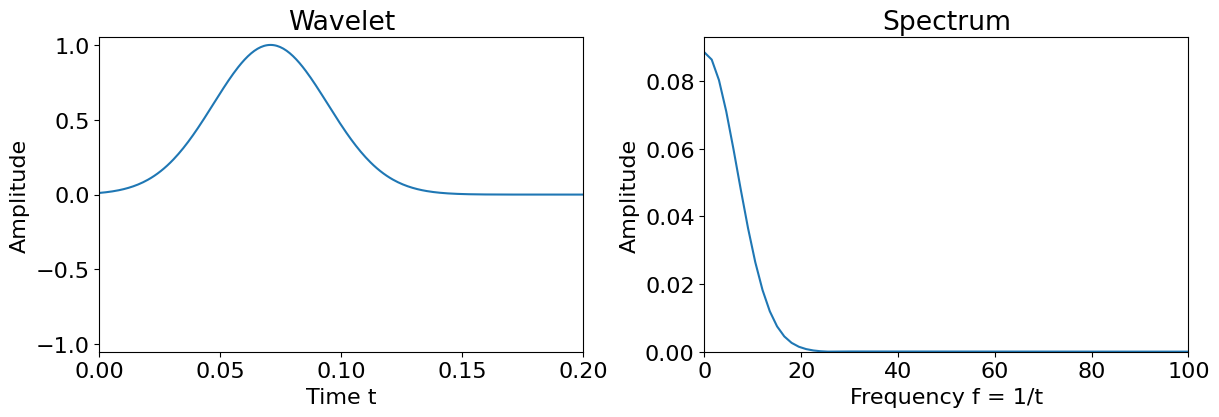

In [5]:
gauss_data = s.wavelet['gauss_soliton'](t, f0)
print(gauss_data[0])
_ = plot_wavelet(t, gauss_data)

## Gaussian derivative wavelet

In [6]:
s.dgauss(n=1)

-2*pi*A*f*(t - t_0)*exp(1/2)*exp(-2*pi**2*f**2*(t - t_0)**2)

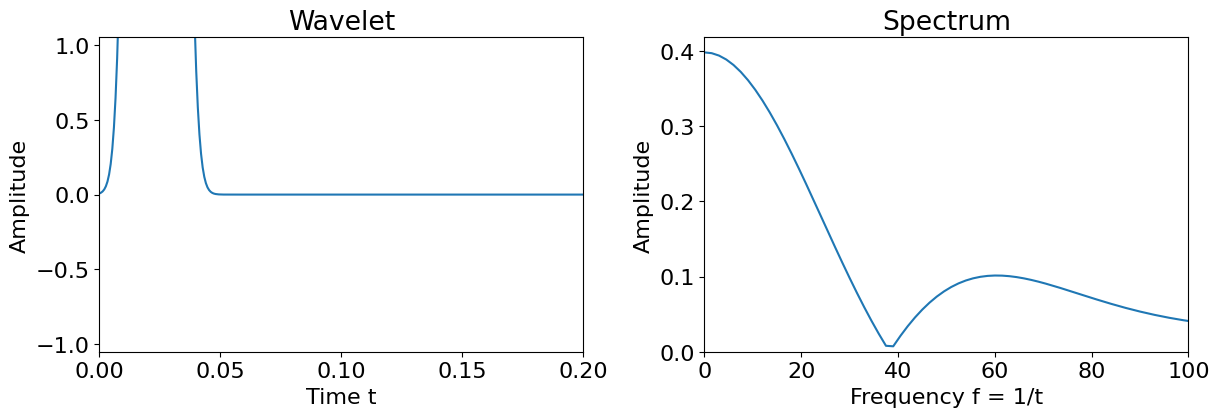

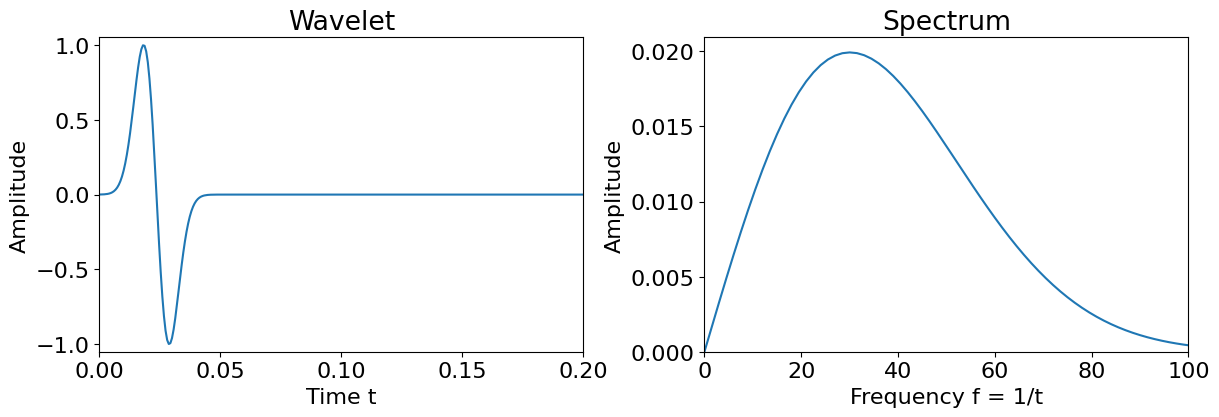

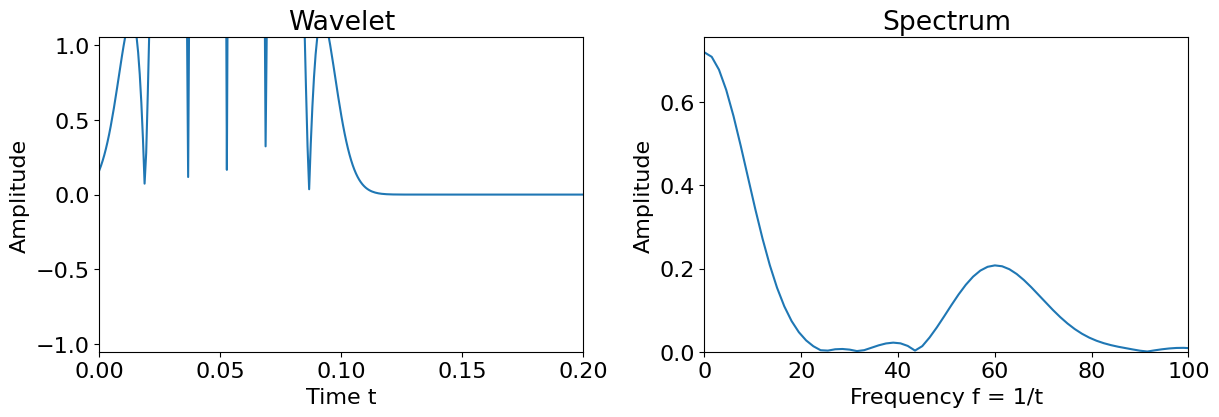

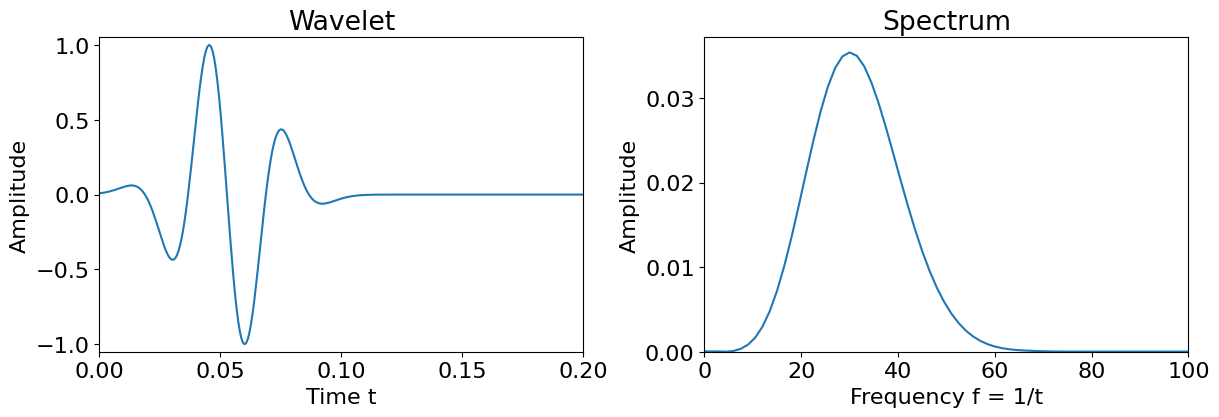

In [7]:
#for n in range(1, 33, 4):
for n in range(1, 9, 4):
    dgauss_data = s.wavelet['dgauss'](t, f0, A=1, n=n)
    _, ax = plot_wavelet(t, 20*np.log(np.abs(dgauss_data) + 1))
    _, ax = plot_wavelet(t, dgauss_data)

## The Ricker wavelet

In [8]:
s.ricker

-A*(2*pi**2*f**2*(t - t_0)**2 - 1)*exp(-pi**2*f**2*(t - t_0)**2)

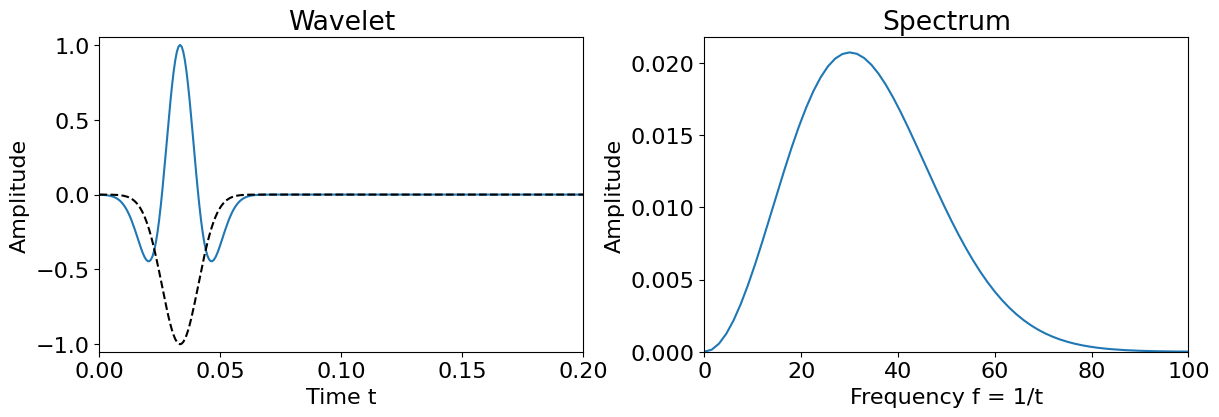

In [9]:
ricker_data = s.wavelet['ricker'](t, f0)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi, 1, t0=1/f0)
_ = plot_wavelet(t, ricker_data, -envelope)

In [10]:
s.wavelet['ricker'](t, f0)

array([-0.00096925, -0.001373  , -0.00192775, ..., -0.        ,
       -0.        , -0.        ])

## The Gabor wavelet

In [11]:
s.gabor

A*exp(-pi**2*f**2*(t - t_0)**2/𝛾**2)*cos(2*pi*f*(t - t_0) + 𝜙)

0.011108996538242316


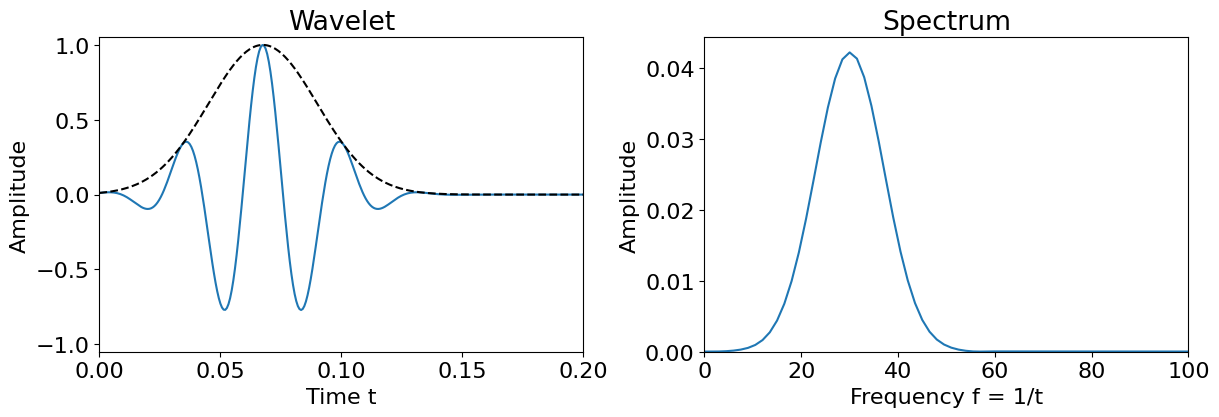

In [12]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
print(envelope[0])
_ = plot_wavelet(t, gabor_data, envelope)

0.011108996538242316


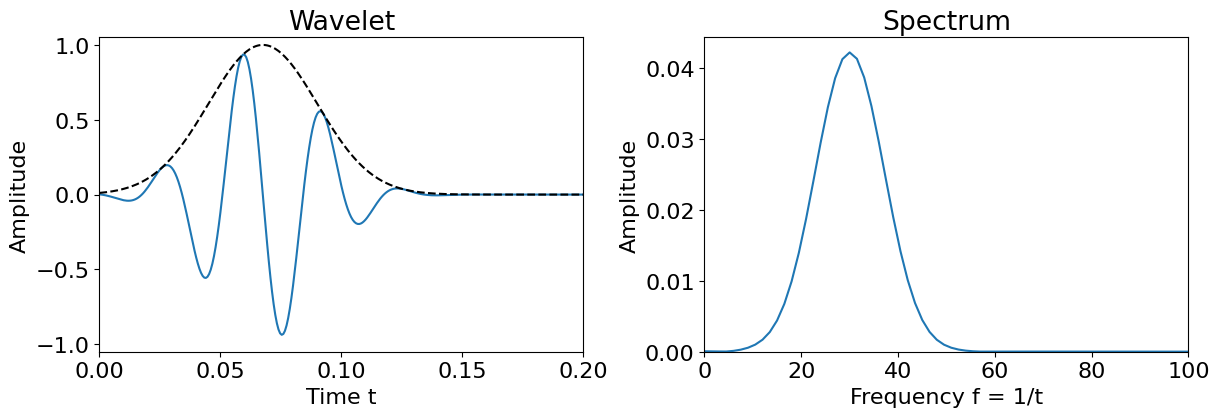

In [13]:
gabor_data = s.wavelet['gabor'](t, f0, 1, gamma=gamma, phi=np.pi/2)
envelope = s.wavelet['gauss_soliton'](t, f0*np.pi/gamma, 1)
print(envelope[0])
_ = plot_wavelet(t, gabor_data, envelope)

In [14]:
s.wavelet['gabor'](gamma*t, f0, gamma=gamma, phi=np.pi/4)

array([0.00901648, 0.00779473, 0.00357392, ..., 0.        , 0.        ,
       0.        ])

## Custom wavelet

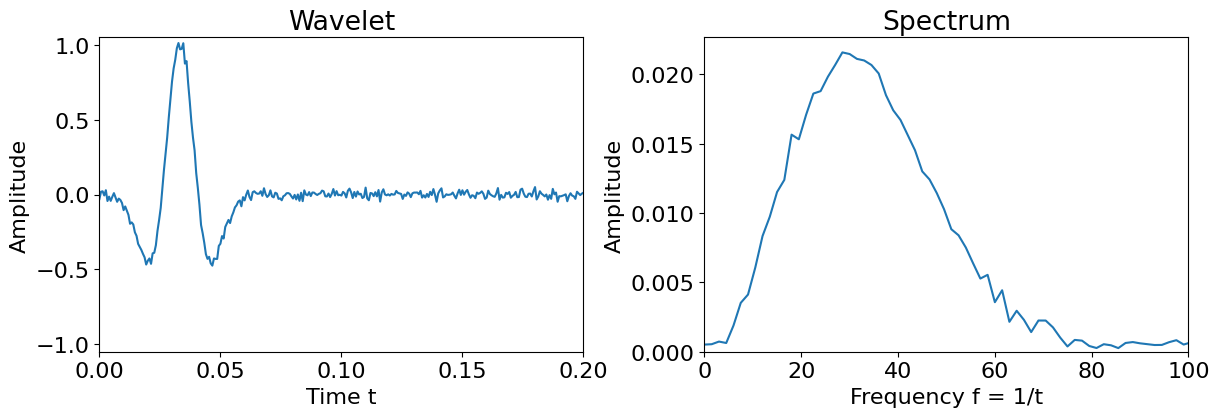

In [15]:
rng = np.random.default_rng(seed=7)
custom_data = s.wavelet['ricker'](t, f0) + np.random.normal(0, 0.02, t.shape)

_ = plot_wavelet(t, custom_data)